# **Projet 4 : Anticipez les besoins en consommation de bâtiments**

#

## **SOMMAIRE**

### **Première partie : Analyse exploratoire**

#### 1- Description génerale des données

 - Les informations statistiques sur ensemble de données

#### 2- Nettoyage, analyse exploratoire et premier feature engineering

- Analyse des features "Outlier" et "ComplianceStatus"

- Etudier les deux features "SiteEnergyUseWN(kBtu)" et "SiteEUIWN(kBtu/sf)" afin de choisir l'une des deux pour la consommation d'énergie

 - Filtre sur les bâtiments non résidentiels

 - Choix des variables

 - Filtre des batiments "NumberofBuildings" sur la propriété

 - Filtre des batiments "NumberofFloors"  avec étage

 - Gestion des Valeurs aberrantes

### Deuxieme Partie: Feature engineering

 -  Matrice de corrélation: heatmap

 - Gestion de la consommation d'énergie

- Création de l'age des bâtiments

 - Création de tranche d'age des batîments

#

#

## **Première partie : Analyse exploratoire**

### **1- Description génerale des données**

**1.1 - Importation les librairies**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io

AttributeError: _ARRAY_API not found

**1.2- Chargement des donnnées**

In [2]:
path_data = r"C:\Users\521169\Documents\Openclassrooms\Projet 4\2016_Building_Energy_Benchmarking.csv"
data = pd.read_csv(path_data)
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


**1.3- Overview des données**

In [3]:
data.shape

(3376, 46)

In [4]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [7]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [8]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


<Axes: >

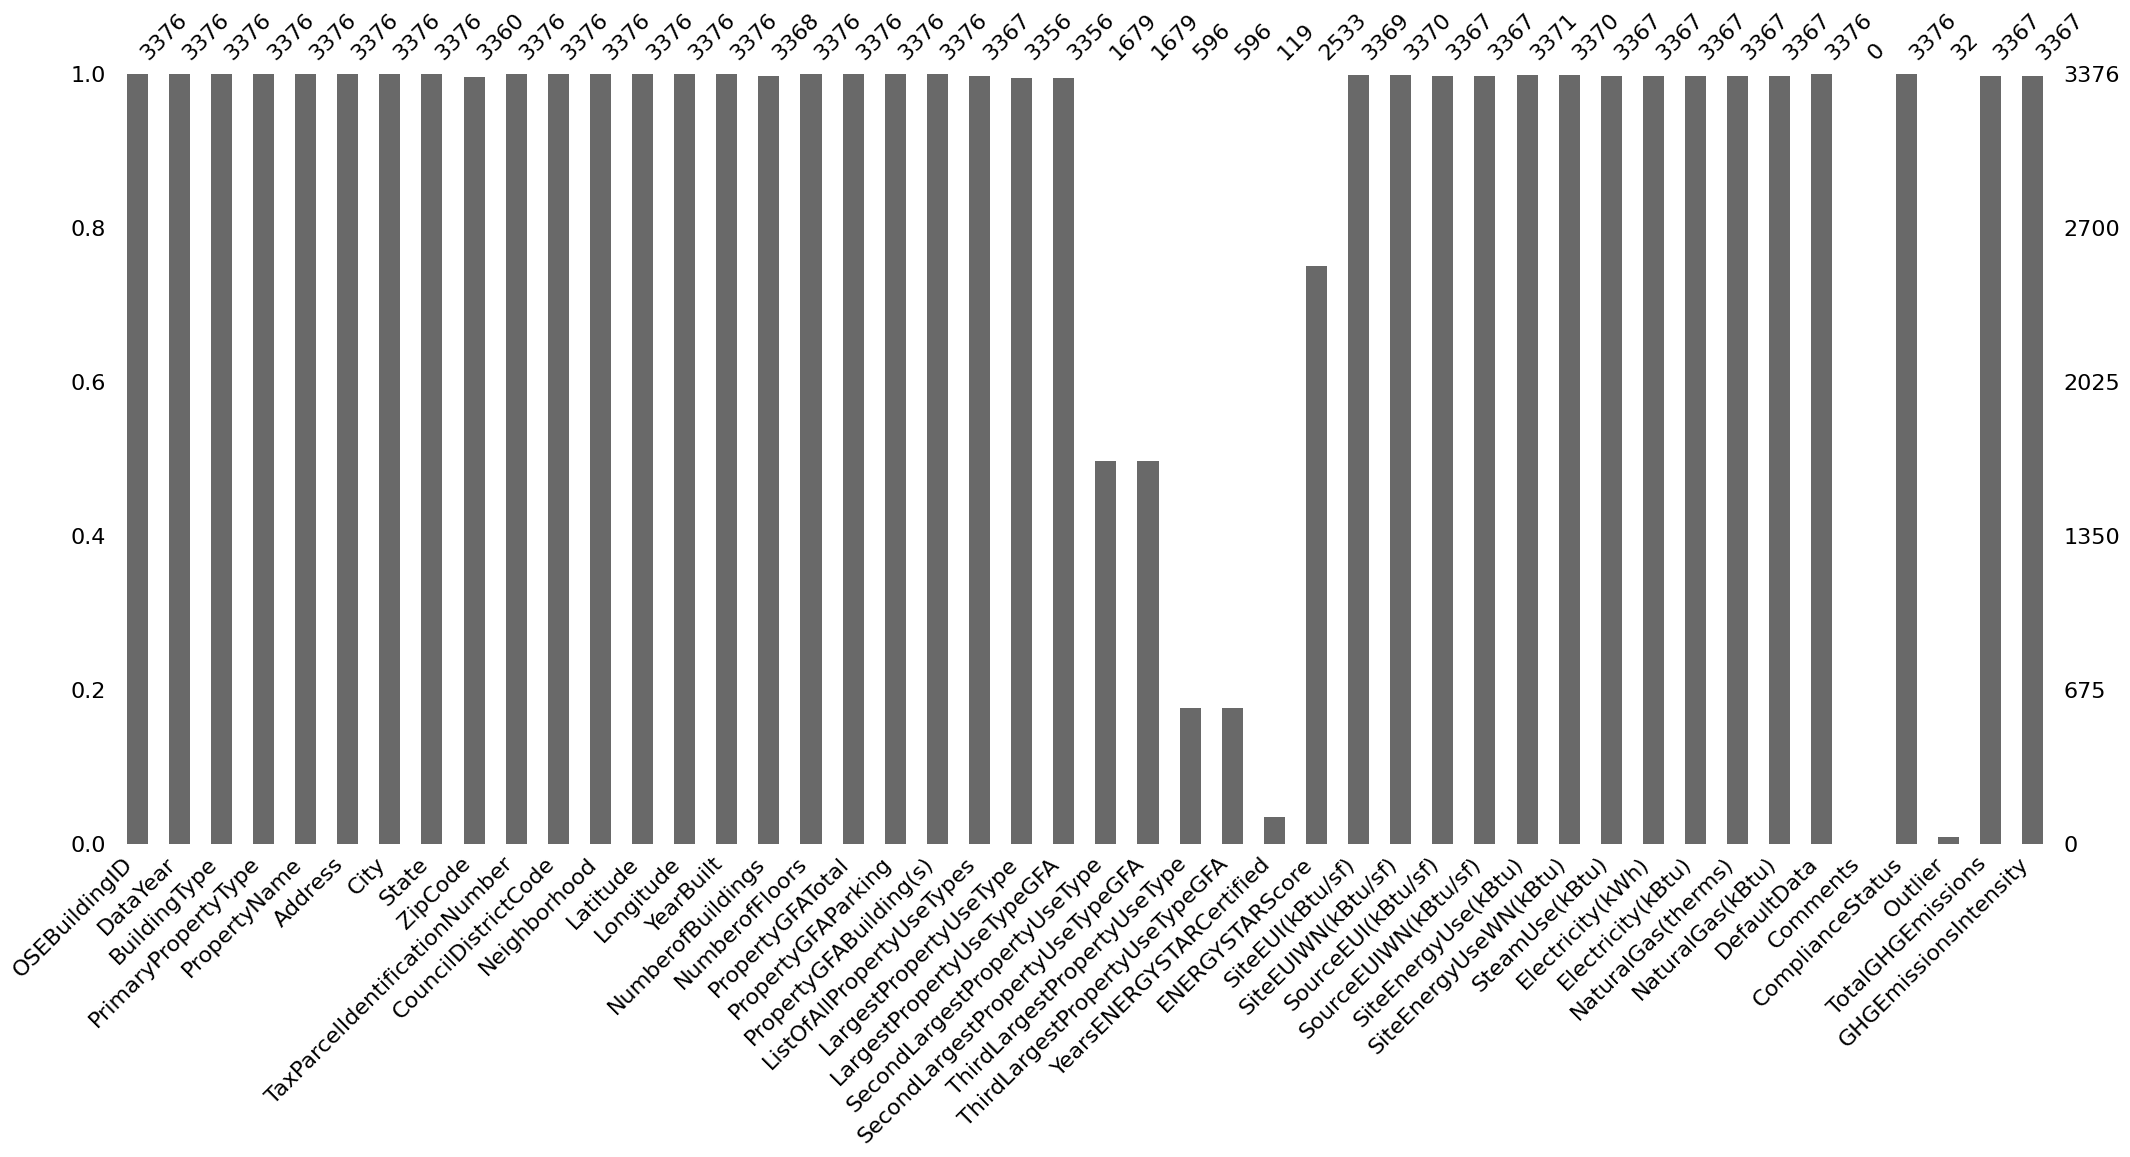

In [9]:
msno.bar(data) # Visualisation des valeurs manquantes

### **2- Data Cleaning**

**2.1- Analyse des features "Outlier" et "ComplianceStatus"**

In [10]:
df_complianceStatus = data["ComplianceStatus"].value_counts()
df_complianceStatus

ComplianceStatus
Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: count, dtype: int64

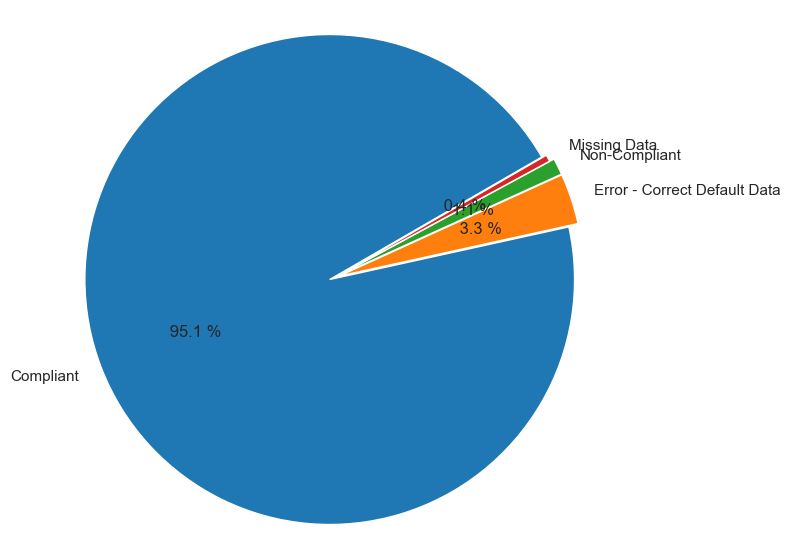

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.set(font_scale=1)
explode = [0.02 if i < 3 else 0 for i in range(len(df_complianceStatus))]
ax.pie(df_complianceStatus,labels=df_complianceStatus.index, explode=explode,autopct='% 1.1f %%', startangle=30)
ax.axis('equal')
plt.show()

In [12]:
df_compliance = data.loc[data["ComplianceStatus"] == "Compliant", :]
df_compliance.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [13]:
df_compliance.shape

(3211, 46)

####  __Analyse de la features **"Outlier"** 

In [14]:
df_compliance[['Outlier']].isnull().sum()

Outlier    3211
dtype: int64

In [15]:
df_compliance['Outlier'].value_counts()

Series([], Name: count, dtype: int64)

In [16]:
df_Outliers = df_compliance['Outlier'].unique()
df_Outliers

array([nan], dtype=object)

### **Après analyse de la variable  <span style="color: blue;"> Outlier </span>,on constate qu'en selectionnant les batiments <span style="color: blue;"> compliance </span>, il ne nous reste que les valeurs manquantes dans cette variable, raison pour laquelle cette variable "Outlier" sera supprimer.** 

#### 2.2- Etudier les deux features **SiteEnergyUseWN(kBtu)** et **SiteEUIWN(kBtu/sf)**, **TotalGHGEmissions**, **ENERGYSTARScore**
Ceci permettra de choisir l'une des deux pour la consommation d'énergie

Text(0, 0.5, 'Frequency')

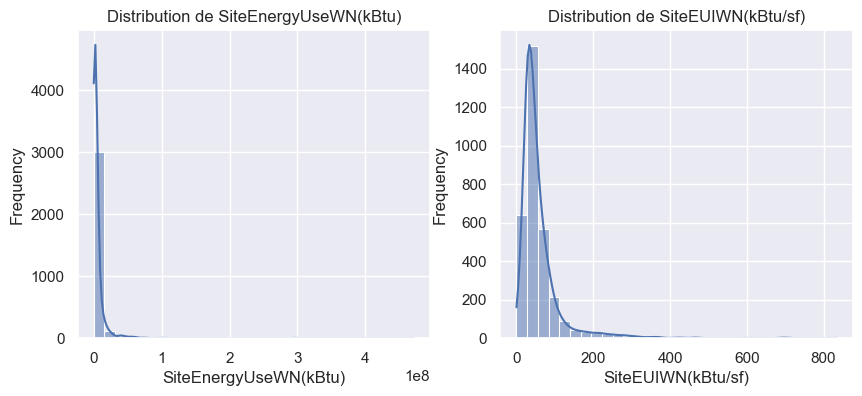

In [17]:
# Préparer les figures
plt.figure(figsize=(10, 4))
# Histogramme pour SiteEnergyUseWN(kBtu)
plt.subplot(1, 2, 1)
sns.histplot(df_compliance['SiteEnergyUseWN(kBtu)'], bins=30, kde=True)
plt.title('Distribution de SiteEnergyUseWN(kBtu)')
plt.xlabel('SiteEnergyUseWN(kBtu)')
plt.ylabel('Frequency')

# Histogramme pour SiteEUIWN(kBtu/sf)
plt.subplot(1, 2, 2)
sns.histplot(df_compliance['SiteEUIWN(kBtu/sf)'], bins=30, kde=True)
plt.title('Distribution de SiteEUIWN(kBtu/sf)')
plt.xlabel('SiteEUIWN(kBtu/sf)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

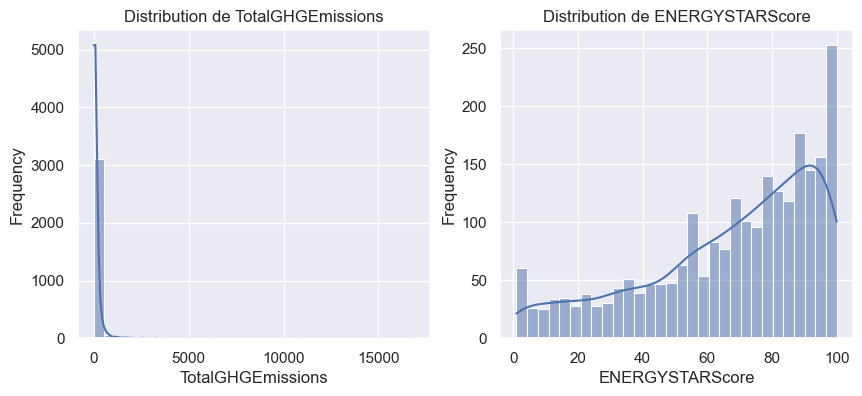

In [18]:
# Préparer les figures
plt.figure(figsize=(10, 4))

# Histogramme pour TotalGHGEmissions
plt.subplot(1, 2, 1)
sns.histplot(df_compliance['TotalGHGEmissions'], bins=30, kde=True)
plt.title('Distribution de TotalGHGEmissions')
plt.xlabel('TotalGHGEmissions')
plt.ylabel('Frequency')

# Histogramme pour SiteEUIWN(kBtu/sf)
plt.subplot(1, 2, 2)
sns.histplot(df_compliance['ENERGYSTARScore'], bins=30, kde=True)
plt.title('Distribution de ENERGYSTARScore')
plt.xlabel('ENERGYSTARScore')
plt.ylabel('Frequency')

### **3- Filtre sur les bâtiments non résidentiels**

BuildingType
NonResidential          44.596699
Multifamily LR (1-4)    30.675802
Multifamily MR (5-9)    17.751479
Multifamily HR (10+)     3.363438
Nonresidential COS       2.522579
Campus                   0.747431
SPS-District K-12        0.311429
Nonresidential WA        0.031143
Name: proportion, dtype: float64


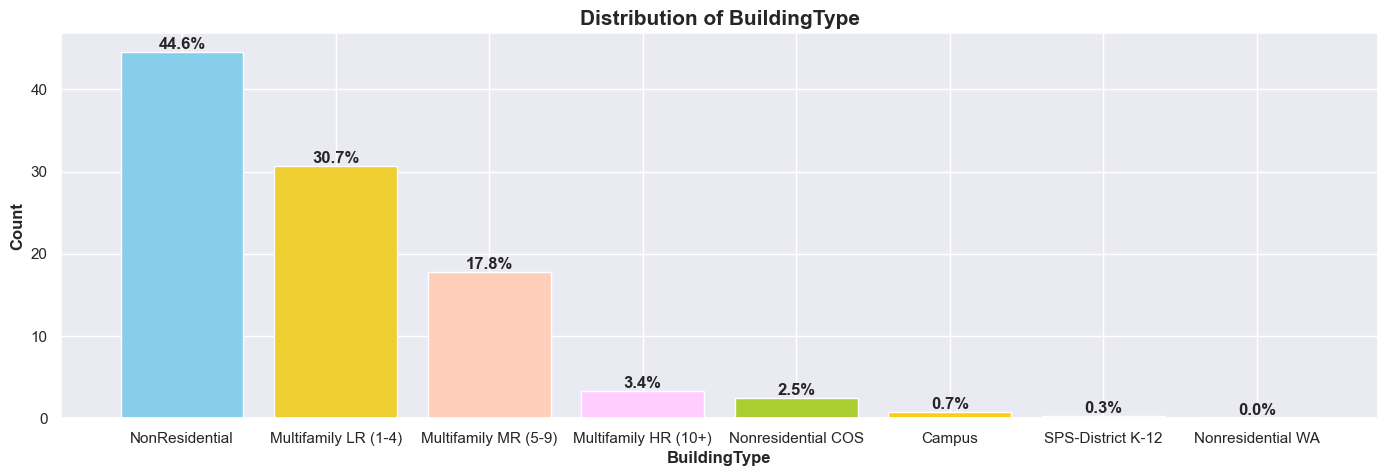

In [19]:
build_df = df_compliance["BuildingType"].value_counts(normalize=True, dropna=False)*100
print(build_df)
# Plot the bar chart
plt.figure(figsize =(17,5))
plt.bar(build_df.index, build_df.values, color = ['Skyblue','#EECE30','#FFCEBB','#FFCDFF','#AACE30','#FFCE14'] )
percentage = build_df / build_df.sum() * 100

for i in range(len(build_df)):
    plt.text(build_df.index[i], build_df.values[i], f'{percentage.iloc[i]:.1f}%', ha='center', va ='bottom',fontweight ='bold', fontsize = 12)

plt.xlabel('BuildingType',fontweight ='bold', fontsize = 12)   
plt.ylabel('Count',fontweight ='bold', fontsize = 12)
plt.title('Distribution of BuildingType',fontweight ='bold', fontsize = 15)
plt.show()

In [48]:
# Selection des batiment compliance et non-residential
df_buildingType = df_compliance[df_compliance["BuildingType"].isin(values = ["NonResidential","Nonresidential WA","Nonresidential COS","Campus","SPS-District K-12"])]
df_buildingType.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [22]:
# Nombre de features et nombre d'observations 
rows, cols = df_buildingType.shape
print(f'Le jeu de données contient {rows} lignes et {cols} colonnes.')

Le jeu de données contient 1548 lignes et 46 colonnes.


In [23]:
df_buildingType.duplicated().sum()

np.int64(0)

#####

## **Choix des variables appropriers dans la suite de l'étude**
### <span style="color: blue;"> Avec la variable "ENERGYSTARScore </span> <span style="color: blue;">  </span>

In [24]:
df = df_buildingType[[ "SiteEnergyUseWN(kBtu)","TotalGHGEmissions","ENERGYSTARScore","Neighborhood","PrimaryPropertyType","ListOfAllPropertyUseTypes","BuildingType","Longitude","Latitude","NumberofFloors",
                             "NumberofBuildings","YearBuilt",'PropertyGFATotal', 'PropertyGFAParking','LargestPropertyUseTypeGFA','PropertyGFABuilding(s)',
                             'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','DataYear','ComplianceStatus'
                    ]] 
df.head()

,SiteEnergyUseWN(kBtu),TotalGHGEmissions,ENERGYSTARScore,Neighborhood,PrimaryPropertyType,ListOfAllPropertyUseTypes,BuildingType,Longitude,Latitude,NumberofFloors,NumberofBuildings,YearBuilt,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,DataYear,ComplianceStatus
0,7456910.0,249.98,60.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33799,47.61220,12,1.0,1927,88434,0,88434.0,88434,NaN,NaN,2016,Compliant
1,8664479.0,295.86,61.0,DOWNTOWN,Hotel,"Hotel, Parking, Restaurant",NonResidential,-122.33393,47.61317,11,1.0,1996,103566,15064,83880.0,88502,15064.0,4622.0,2016,Compliant
2,73937112.0,2089.28,43.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33810,47.61393,41,1.0,1969,956110,196718,756493.0,759392,NaN,NaN,2016,Compliant
3,6946800.5,286.43,56.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33664,47.61412,10,1.0,1926,61320,0,61320.0,61320,NaN,NaN,2016,Compliant
4,14656503.0,505.01,75.0,DOWNTOWN,Hotel,"Hotel, Parking, Swimming Pool",NonResidential,-122.34047,47.61375,18,1.0,1980,175580,62000,123445.0,113580,68009.0,0.0,2016,Compliant


In [51]:
df.isnull().sum()

SiteEnergyUseWN(kBtu)                 1
TotalGHGEmissions                     0
ENERGYSTARScore                     551
Neighborhood                          0
PrimaryPropertyType                   0
ListOfAllPropertyUseTypes             0
BuildingType                          0
Longitude                             0
Latitude                              0
NumberofFloors                        0
NumberofBuildings                     0
YearBuilt                             0
PropertyGFATotal                      0
PropertyGFAParking                    0
LargestPropertyUseTypeGFA             4
PropertyGFABuilding(s)                0
SecondLargestPropertyUseTypeGFA     706
ThirdLargestPropertyUseTypeGFA     1200
DataYear                              0
ComplianceStatus                      0
dtype: int64

In [66]:
df_ENERGYSTARScore = df
df_ENERGYSTARScore.head()

,SiteEnergyUseWN(kBtu),TotalGHGEmissions,ENERGYSTARScore,Neighborhood,PrimaryPropertyType,ListOfAllPropertyUseTypes,BuildingType,Longitude,Latitude,NumberofFloors,NumberofBuildings,YearBuilt,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,DataYear,ComplianceStatus
0,7456910.0,249.98,60.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33799,47.61220,12,1.0,1927,88434,0,88434.0,88434,NaN,NaN,2016,Compliant
1,8664479.0,295.86,61.0,DOWNTOWN,Hotel,"Hotel, Parking, Restaurant",NonResidential,-122.33393,47.61317,11,1.0,1996,103566,15064,83880.0,88502,15064.0,4622.0,2016,Compliant
2,73937112.0,2089.28,43.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33810,47.61393,41,1.0,1969,956110,196718,756493.0,759392,NaN,NaN,2016,Compliant
3,6946800.5,286.43,56.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33664,47.61412,10,1.0,1926,61320,0,61320.0,61320,NaN,NaN,2016,Compliant
4,14656503.0,505.01,75.0,DOWNTOWN,Hotel,"Hotel, Parking, Swimming Pool",NonResidential,-122.34047,47.61375,18,1.0,1980,175580,62000,123445.0,113580,68009.0,0.0,2016,Compliant


### Analyse du type de variables

In [67]:
df_ENERGYSTARScore.dtypes

SiteEnergyUseWN(kBtu)              float64
TotalGHGEmissions                  float64
ENERGYSTARScore                    float64
Neighborhood                        object
PrimaryPropertyType                 object
ListOfAllPropertyUseTypes           object
BuildingType                        object
Longitude                          float64
Latitude                           float64
NumberofFloors                       int64
NumberofBuildings                  float64
YearBuilt                            int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
LargestPropertyUseTypeGFA          float64
PropertyGFABuilding(s)               int64
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseTypeGFA     float64
DataYear                             int64
ComplianceStatus                    object
dtype: object

In [68]:
df_type_numerique = df_ENERGYSTARScore.select_dtypes(include=['float', 'int'])
df_type_numerique.head()

,SiteEnergyUseWN(kBtu),TotalGHGEmissions,ENERGYSTARScore,Longitude,Latitude,NumberofFloors,NumberofBuildings,YearBuilt,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,DataYear
0,7456910.0,249.98,60.0,-122.33799,47.61220,12,1.0,1927,88434,0,88434.0,88434,NaN,NaN,2016
1,8664479.0,295.86,61.0,-122.33393,47.61317,11,1.0,1996,103566,15064,83880.0,88502,15064.0,4622.0,2016
2,73937112.0,2089.28,43.0,-122.33810,47.61393,41,1.0,1969,956110,196718,756493.0,759392,NaN,NaN,2016
3,6946800.5,286.43,56.0,-122.33664,47.61412,10,1.0,1926,61320,0,61320.0,61320,NaN,NaN,2016
4,14656503.0,505.01,75.0,-122.34047,47.61375,18,1.0,1980,175580,62000,123445.0,113580,68009.0,0.0,2016


**__ Variable continue ou discrète__**

In [69]:
df_ENERGYSTARScore.shape

(1548, 20)

In [70]:
df_ENERGYSTARScore.nunique()

SiteEnergyUseWN(kBtu)              1539
TotalGHGEmissions                  1489
ENERGYSTARScore                     100
Neighborhood                         19
PrimaryPropertyType                  21
ListOfAllPropertyUseTypes           370
BuildingType                          5
Longitude                          1305
Latitude                           1389
NumberofFloors                       45
NumberofBuildings                    16
YearBuilt                           113
PropertyGFATotal                   1473
PropertyGFAParking                  324
LargestPropertyUseTypeGFA          1449
PropertyGFABuilding(s)             1467
SecondLargestPropertyUseTypeGFA     693
ThirdLargestPropertyUseTypeGFA      300
DataYear                              1
ComplianceStatus                      1
dtype: int64

## Identification des valeurs manquantes

In [71]:
# identification des valeurs manquantes dans la variable "ENERGYSTARScore"
ENERGYSTARScore_missing_count = df_ENERGYSTARScore['ENERGYSTARScore'].isnull().sum()
print(f"Nombre de valeurs manquantes dans ENERGYSTARScore : {ENERGYSTARScore_missing_count}")

Nombre de valeurs manquantes dans ENERGYSTARScore : 551


In [72]:
# pourcentage des valeurs manquantes sur le jeu de donnée
print(f"longueur du jeu de donnée: {len(df_ENERGYSTARScore)}")
missing_percentage_total = round(ENERGYSTARScore_missing_count/len(df_ENERGYSTARScore)*100,2)
print(f"le pourcentage des valeurs manquantes sur le jeu de donnée est: {missing_percentage_total}%")

longueur du jeu de donnée: 1548
le pourcentage des valeurs manquantes sur le jeu de donnée est: 35.59%


# Comprendre les valeurs manquantes

### 1- Identifier le type de données manquantes

Les données manquantes peuvent être classées en trois catégories :

a) MCAR (Manquant Complètement au Hasard) : Les données manquent indépendamment des autres variables ou de la variable elle-même.

b) MAR (Manquant au Hasard) : Les données manquent en fonction d'autres variables observables.

c) MNAR (Manquant Non au Hasard) : Les données manquent en raison de la variable elle-même ou d'autres variables non observées.

### Tester l'hypothèse MCAR(Manquant Complètement au Hasard)

#### Pour vérifier si les données manquantes suivent le principe MCAR, on utilise des tests statistiques ou des analyses descriptives.

#### a) Test chi2

In [74]:
from scipy.stats import chi2_contingency

df_ENERGYSTARScore_test = df_ENERGYSTARScore

df_ENERGYSTARScore_test = df_ENERGYSTARScore_test.copy()
# 'ENERGYSTARScore_missing' colonne binaire pour indiquer si la variable est manquante
df_ENERGYSTARScore_test['ENERGYSTARScore_missing'] = df_ENERGYSTARScore_test['ENERGYSTARScore'].isnull().astype(int)

# Initialisons la liste des résultats
results = []

# Parcourir toutes les colonnes du DataFrame (sauf celle que nous testons et la colonne binaire créée)
for column in df_ENERGYSTARScore_test.columns:
    if column not in ['ENERGYSTARScore', 'ENERGYSTARScore_missing']:
        try:
            # Si la variable est continue, la discrétiser en quartiles pour le test du Chi²
            if df_ENERGYSTARScore_test[column].dtype in ['float64', 'int64']:
                df_ENERGYSTARScore_test[column] = pd.qcut(df_ENERGYSTARScore_test[column], q=4, duplicates='drop')

            # table de contingence
            contingency_table = pd.crosstab(df_ENERGYSTARScore_test['ENERGYSTARScore_missing'], df_ENERGYSTARScore_test[column])

            # test du Chi²
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            # Stocker les résultats
            results.append({'Variable': column, 'p_value': p_value, 'Significatif': p_value < 0.05})
        except Exception as e:
            # les erreurs si une variable a trop de catégories
            results.append({'Variable': column, 'p_value': None, 'Significatif': False, 'Error': str(e)})

# Convertir les résultats en DataFrame pour analyse
results_df = pd.DataFrame(results)
print(results_df)

# Filtrons les variables significatives
significant_vars = results_df[results_df['Significatif'] == True]
print("\nVariables pour lesquelles les données manquantes de 'ENERGYSTARScore' ne sont pas MCAR (relation détectée) :")
print(significant_vars)


                           Variable        p_value  Significatif  \
0             SiteEnergyUseWN(kBtu)   2.497266e-01         False   
1                 TotalGHGEmissions   9.179231e-01         False   
2                      Neighborhood   1.530123e-01         False   
3               PrimaryPropertyType  1.123331e-171          True   
4         ListOfAllPropertyUseTypes   2.395602e-85          True   
5                      BuildingType   1.512638e-28          True   
6                         Longitude   7.423476e-02         False   
7                          Latitude   9.554422e-01         False   
8                    NumberofFloors   2.683952e-11          True   
9                 NumberofBuildings   6.233779e-10          True   
10                        YearBuilt   3.620308e-05          True   
11                 PropertyGFATotal   2.717463e-07          True   
12               PropertyGFAParking   1.000000e+00         False   
13        LargestPropertyUseTypeGFA   7.774634e-

### Les résultats du test montre que les valeurs manquantes de la variable **ENERGYSTARScore** ont belle et bien un impacte significatif sur la majorité des variables.

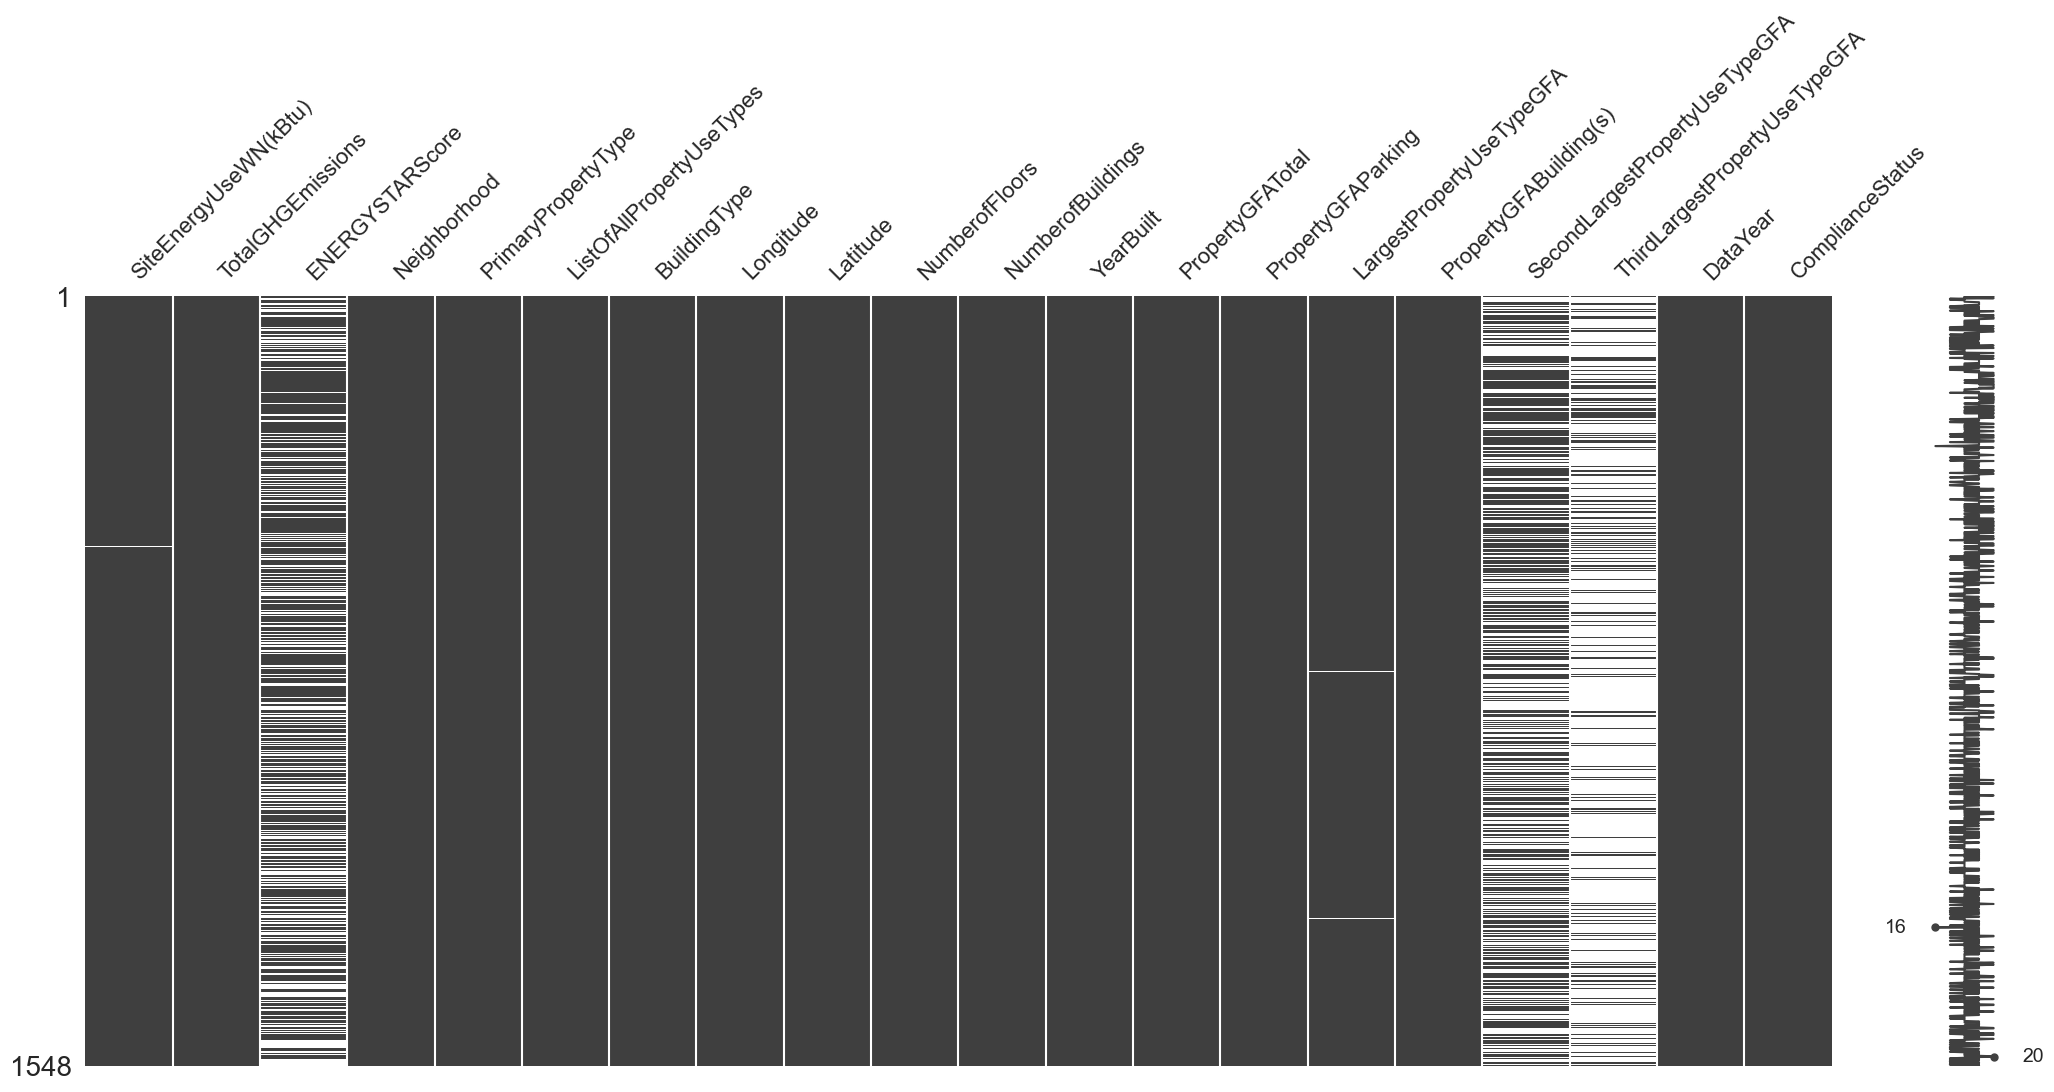

In [75]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualiser les données manquantes
msno.matrix(df_ENERGYSTARScore)
plt.show()

### Identifier les valeurs aberrantes (par IQR)

In [76]:
# Identifier les valeurs aberrantes (par IQR)
Q1 = df_ENERGYSTARScore['ENERGYSTARScore'].quantile(0.25)
Q3 = df_ENERGYSTARScore['ENERGYSTARScore'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_ENERGYSTARScore[(df_ENERGYSTARScore['ENERGYSTARScore'] < Q1 - 1.5 * IQR) | (df_ENERGYSTARScore['ENERGYSTARScore'] > Q3 + 1.5 * IQR)]
print(f"Nombre de valeurs aberrantes dans ENERGYSTARScore : {outliers.shape[0]}")

Nombre de valeurs aberrantes dans ENERGYSTARScore : 0


In [77]:
# Identifier les colonnes numériques avec 10% de valeurs uniques
threshold = 155  
discrètes_columns = [
    col for col in df_ENERGYSTARScore.select_dtypes(include=['float', 'int']).columns
    if df_ENERGYSTARScore[col].nunique() < threshold
]
discrètes_columns

['ENERGYSTARScore',
 'NumberofFloors',
 'NumberofBuildings',
 'YearBuilt',
 'DataYear']

- **Etude de la Normalité**

- <span style="color: blue;"> NumberofFloors </span>

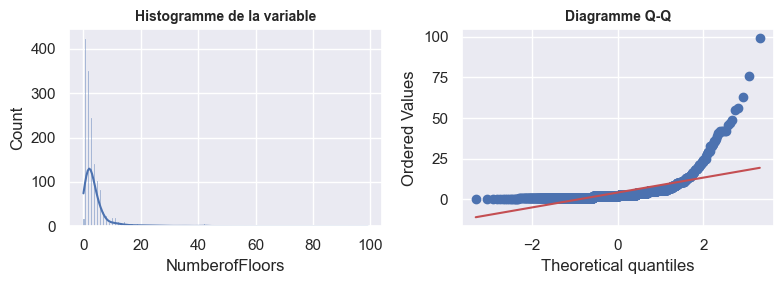

In [78]:
# Création des sous-plots
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
# Histogramme avec la densité KDE
sns.histplot(df_ENERGYSTARScore['NumberofFloors'], kde=True, ax=axes[0])
axes[0].set_title("Histogramme de la variable", fontsize = 10, fontweight = 'bold')
# Diagramme Q-Q
stats.probplot(df_ENERGYSTARScore['NumberofFloors'], dist="norm", plot=axes[1])
axes[1].set_title("Diagramme Q-Q", fontsize = 10, fontweight = 'bold')
plt.tight_layout()
plt.show()

**La méthode graphique**: histogramme nous montre que les valeurs sont beaucoup plus concentrées vers la gauche(Une asymétrie (skewness)).
De plus le diagramme Q-Q montre que tous les points ne suivent pas la diagonale avec une asymétrie lourde aux extraimes. On peut donc deduire que la variable est anormale.

In [80]:
df_NumberofFloors  = df_ENERGYSTARScore['NumberofFloors'].value_counts(normalize=True, dropna=False)*100
# transformons l'âge en variable catégorielle
pd.qcut(df_ENERGYSTARScore.NumberofFloors, q=5).head()

0    (5.0, 99.0]
1    (5.0, 99.0]
2    (5.0, 99.0]
3    (5.0, 99.0]
4    (5.0, 99.0]
Name: NumberofFloors, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 5.0] < (5.0, 99.0]]

In [81]:
df_ENERGYSTARScore = df_ENERGYSTARScore.copy()
df_ENERGYSTARScore['NumberofFloors_category'] = pd.qcut(df_ENERGYSTARScore.NumberofFloors, q=5, labels=['1 et moins',
                                                               '1 - 2',
                                                               '2 - 3',
                                                               '3 - 6',
                                                               '6 et plus'
                                                               ])
floor = df_ENERGYSTARScore['NumberofFloors_category'].value_counts()
floor

NumberofFloors_category
1 et moins    439
1 - 2         350
6 et plus     274
2 - 3         243
3 - 6         242
Name: count, dtype: int64

In [82]:
df_ENERGYSTARScore = df_ENERGYSTARScore.drop("NumberofFloors", axis = 1)

- <span style="color: blue;"> NumberofBuildings </span>

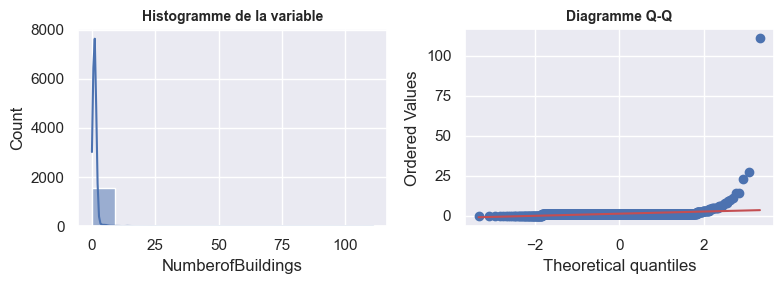

In [83]:
# Création des sous-plots
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
# Histogramme avec la densité KDE
sns.histplot(df_ENERGYSTARScore['NumberofBuildings'], kde=True, ax=axes[0])
axes[0].set_title("Histogramme de la variable", fontsize = 10, fontweight = 'bold')
# Diagramme Q-Q
stats.probplot(df_ENERGYSTARScore['NumberofBuildings'], dist="norm", plot=axes[1])
axes[1].set_title("Diagramme Q-Q", fontsize = 10, fontweight = 'bold')
plt.tight_layout()
plt.show()

**La méthode graphique**: histogramme nous montre que les valeurs ne sont pas étallées,mais plutôt concentrée vers la gauche(Une asymétrie (skewness)).
De plus le diagramme Q-Q montre que tous les points ne suivent pas la diagonale avec une asymétrie lourde à l'extrémité droite. On peut donc deduire que la variable est anormale.

In [84]:
df_NumberofFloors  = df_ENERGYSTARScore['NumberofBuildings'].value_counts(normalize=True, dropna=False)*100
# transformons NumberofBuildings en variable catégorielle
pd.qcut(df_ENERGYSTARScore.NumberofBuildings, q=2).head(4)

0    (-0.001, 1.0]
1    (-0.001, 1.0]
2    (-0.001, 1.0]
3    (-0.001, 1.0]
Name: NumberofBuildings, dtype: category
Categories (2, interval[float64, right]): [(-0.001, 1.0] < (1.0, 111.0]]

In [85]:
df_ENERGYSTARScore['NumberofBuildings_category'] = pd.qcut(df_ENERGYSTARScore.NumberofBuildings, q=2, labels=['1 et moins',
                                                                                                              '1 et plus'
                                                                                                             ])
df_ENERGYSTARScore['NumberofBuildings_category'].value_counts()

NumberofBuildings_category
1 et moins    1496
1 et plus       52
Name: count, dtype: int64

In [86]:
df_ENERGYSTARScore = df_ENERGYSTARScore.drop("NumberofBuildings", axis = 1)

######

### Correlation entre les variables

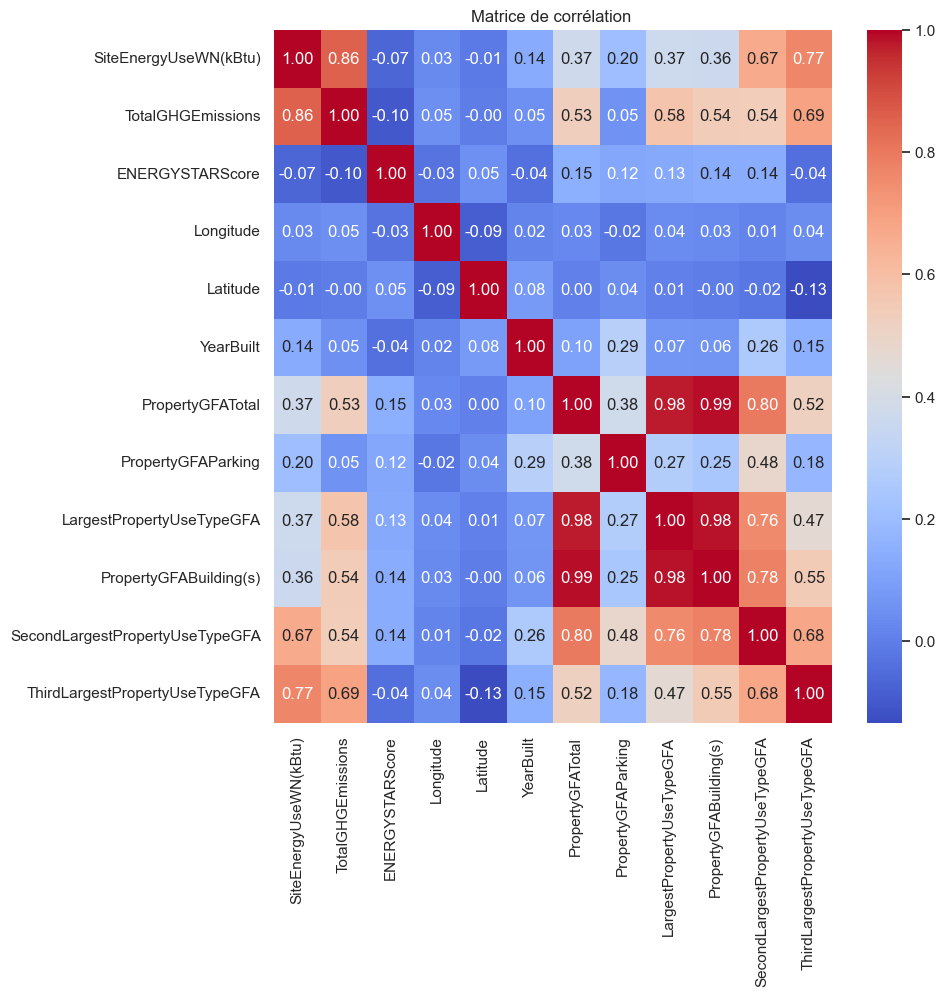

In [87]:
# Calculez la matrice de corrélation
plt.figure(figsize=(9,9))
correlation_var = df_ENERGYSTARScore.select_dtypes(include=['float', 'int'])
correlation_var=correlation_var.drop("DataYear",axis=1)
correlation_matrix = correlation_var.corr()
# Affichez un heatmap de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation ")
plt.show()

### **Correlation forte obtenue entre les différentes variables**: 
- **PropertyGFATotal** & **PropertyGFABuilding** d'une valeur de **0,98**  
- **PropertyGFATotal***  & **LargestPropertyUseTypeGFA** de **0,95**
- **PropertyGFABuilding***  & **LargestPropertyUseTypeGFA** de **0,95**
- **LargestPropertyUseTypeGFA** & **Electricity(kBtu)** d'une valeur de **0,89**
- **SecondLargestPropertyUseTypeGFA** &  **LargestPropertyUseTypeGFA** de **0,80**
- **PropertyGFATotal***  & **Electricity(kBtu)** de **0,87**
- **TotalGHGEmissions** & **SiteEnergyUseWN(kBtu)** d'une valeur de **0,92** 
- **SecondLargestPropertyUseTypeGFA** & **PropertyGFABuilding** d'une valeur de **0,78**  
- **ThirdLargestPropertyUseTypeGFA** & **SiteEnergyUseWN(kBtu)** d'une valeur de **0,77** 

### Analyse des variables catégorielles

In [88]:
df_type_categorielle = df_ENERGYSTARScore.select_dtypes(include='object').columns
df_type_categorielle

Index(['Neighborhood', 'PrimaryPropertyType', 'ListOfAllPropertyUseTypes',
       'BuildingType', 'ComplianceStatus'],
      dtype='object')

### Deuxieme Partie: feature enginneering

- **Pourcentage des propriétés(parking, building)**

Prendre en compte également la proportion de surface d'une propriété et du parking en Créant les variables des pourcentages de la surface d'une propriété et du parking 

In [89]:
df_percentage_property = df_ENERGYSTARScore
# Calculons le pourcentage de chaque partie d'une propriété(parking, building) sur une propriété total
df_percentage_property['GFA_Building_Rate'] = (round((df_percentage_property['PropertyGFABuilding(s)']
                                  /df_percentage_property['PropertyGFATotal']),2))
df_percentage_property['GFA_Parking_Rate'] = (round((df_percentage_property['PropertyGFAParking']
                                 /df_percentage_property['PropertyGFATotal']),2))
# supprime des variables PropertyGFAParking et PropertyGFABuilding(s)
df_percentage_property = df_percentage_property.drop(columns =["PropertyGFAParking","PropertyGFABuilding(s)"], axis =1)
df_percentage_property.head()

,SiteEnergyUseWN(kBtu),TotalGHGEmissions,ENERGYSTARScore,Neighborhood,PrimaryPropertyType,ListOfAllPropertyUseTypes,BuildingType,Longitude,Latitude,YearBuilt,PropertyGFATotal,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,DataYear,ComplianceStatus,NumberofFloors_category,NumberofBuildings_category,GFA_Building_Rate,GFA_Parking_Rate
0,7456910.0,249.98,60.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33799,47.61220,1927,88434,88434.0,NaN,NaN,2016,Compliant,6 et plus,1 et moins,1.00,0.00
1,8664479.0,295.86,61.0,DOWNTOWN,Hotel,"Hotel, Parking, Restaurant",NonResidential,-122.33393,47.61317,1996,103566,83880.0,15064.0,4622.0,2016,Compliant,6 et plus,1 et moins,0.85,0.15
2,73937112.0,2089.28,43.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33810,47.61393,1969,956110,756493.0,NaN,NaN,2016,Compliant,6 et plus,1 et moins,0.79,0.21
3,6946800.5,286.43,56.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33664,47.61412,1926,61320,61320.0,NaN,NaN,2016,Compliant,6 et plus,1 et moins,1.00,0.00
4,14656503.0,505.01,75.0,DOWNTOWN,Hotel,"Hotel, Parking, Swimming Pool",NonResidential,-122.34047,47.61375,1980,175580,123445.0,68009.0,0.0,2016,Compliant,6 et plus,1 et moins,0.65,0.35


- **Création de l'âge des bâtiments**

In [90]:
Age_Batiment = df_percentage_property
# calcul de l'âge des bâtiments
Age_Batiment['Building_Age'] = Age_Batiment['DataYear'] - Age_Batiment['YearBuilt']
# drop << YearBuilt >> column
Age_Batiment.drop(['DataYear', 'YearBuilt'], axis=1, inplace=True)
Age_Batiment.head()

,SiteEnergyUseWN(kBtu),TotalGHGEmissions,ENERGYSTARScore,Neighborhood,PrimaryPropertyType,ListOfAllPropertyUseTypes,BuildingType,Longitude,Latitude,PropertyGFATotal,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ComplianceStatus,NumberofFloors_category,NumberofBuildings_category,GFA_Building_Rate,GFA_Parking_Rate,Building_Age
0,7456910.0,249.98,60.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33799,47.61220,88434,88434.0,NaN,NaN,Compliant,6 et plus,1 et moins,1.00,0.00,89
1,8664479.0,295.86,61.0,DOWNTOWN,Hotel,"Hotel, Parking, Restaurant",NonResidential,-122.33393,47.61317,103566,83880.0,15064.0,4622.0,Compliant,6 et plus,1 et moins,0.85,0.15,20
2,73937112.0,2089.28,43.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33810,47.61393,956110,756493.0,NaN,NaN,Compliant,6 et plus,1 et moins,0.79,0.21,47
3,6946800.5,286.43,56.0,DOWNTOWN,Hotel,Hotel,NonResidential,-122.33664,47.61412,61320,61320.0,NaN,NaN,Compliant,6 et plus,1 et moins,1.00,0.00,90
4,14656503.0,505.01,75.0,DOWNTOWN,Hotel,"Hotel, Parking, Swimming Pool",NonResidential,-122.34047,47.61375,175580,123445.0,68009.0,0.0,Compliant,6 et plus,1 et moins,0.65,0.35,36


In [91]:
Age_Batiment['Building_Age'].unique()

array([ 89,  20,  47,  90,  36,  17, 112,  18,  88,  94,  12,  86,  33,
       109, 100,  31,  15,  25,  38, 110,  22,  61,  24,  55,  26, 116,
        62, 105,  43,  96, 106,  34, 108,  57,  16,  19,  54,  46,   8,
        51,  87,   6,  78,  30,  14,  93,  13,  75,  10, 101,  66,  58,
         7,   5,  45,   9,  65,  52,  63,  79,  50,  59,  48,  92,  11,
        85,  44,  64, 102, 103,  21,  35,  27,  91,  40, 107,  28,  37,
        69,  32,  60, 104,  39,  56,  71,  53,  42,  41,  70,  49,  29,
        67,  76,  84,  68,  23,  98, 111, 114,  95,  77,  72,  99,  74,
       113,   4,   3,  97, 115,  80,  81,   2,   1])

- **Creation d'une colonne "SumUseType" qui est le nombre de propriété par bâtiment**  

In [92]:
# Création de la colonne "SumUseType" 
Age_Batiment['SumUseType'] = [str(word).count(",") + 1 for word in Age_Batiment['ListOfAllPropertyUseTypes'].str.split(',')]
Age_Batiment=Age_Batiment.drop("ListOfAllPropertyUseTypes", axis=1)
Age_Batiment.head()

,SiteEnergyUseWN(kBtu),TotalGHGEmissions,ENERGYSTARScore,Neighborhood,PrimaryPropertyType,BuildingType,Longitude,Latitude,PropertyGFATotal,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ComplianceStatus,NumberofFloors_category,NumberofBuildings_category,GFA_Building_Rate,GFA_Parking_Rate,Building_Age,SumUseType
0,7456910.0,249.98,60.0,DOWNTOWN,Hotel,NonResidential,-122.33799,47.61220,88434,88434.0,NaN,NaN,Compliant,6 et plus,1 et moins,1.00,0.00,89,1
1,8664479.0,295.86,61.0,DOWNTOWN,Hotel,NonResidential,-122.33393,47.61317,103566,83880.0,15064.0,4622.0,Compliant,6 et plus,1 et moins,0.85,0.15,20,3
2,73937112.0,2089.28,43.0,DOWNTOWN,Hotel,NonResidential,-122.33810,47.61393,956110,756493.0,NaN,NaN,Compliant,6 et plus,1 et moins,0.79,0.21,47,1
3,6946800.5,286.43,56.0,DOWNTOWN,Hotel,NonResidential,-122.33664,47.61412,61320,61320.0,NaN,NaN,Compliant,6 et plus,1 et moins,1.00,0.00,90,1
4,14656503.0,505.01,75.0,DOWNTOWN,Hotel,NonResidential,-122.34047,47.61375,175580,123445.0,68009.0,0.0,Compliant,6 et plus,1 et moins,0.65,0.35,36,3


 - **Interessons nous au **GFA**: "Gross Floor Area" ou "surface de plancher brute"**

In [93]:
GFA_area = Age_Batiment
# Créer une fonction qui permet de regrouper les variables contenant le suffix GFA en un sous dataFrane
def research_componant_GFA (GFA_area, suffix=None):
  componant = []
  for col in GFA_area.columns:
      if suffix in col: 
        componant.append(col)
  return componant

In [94]:
GFA_columns = research_componant_GFA(GFA_area, suffix='GFA')
GFA_area[GFA_columns].head()

,PropertyGFATotal,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,GFA_Building_Rate,GFA_Parking_Rate
0,88434,88434.0,NaN,NaN,1.00,0.00
1,103566,83880.0,15064.0,4622.0,0.85,0.15
2,956110,756493.0,NaN,NaN,0.79,0.21
3,61320,61320.0,NaN,NaN,1.00,0.00
4,175580,123445.0,68009.0,0.0,0.65,0.35


<Axes: >

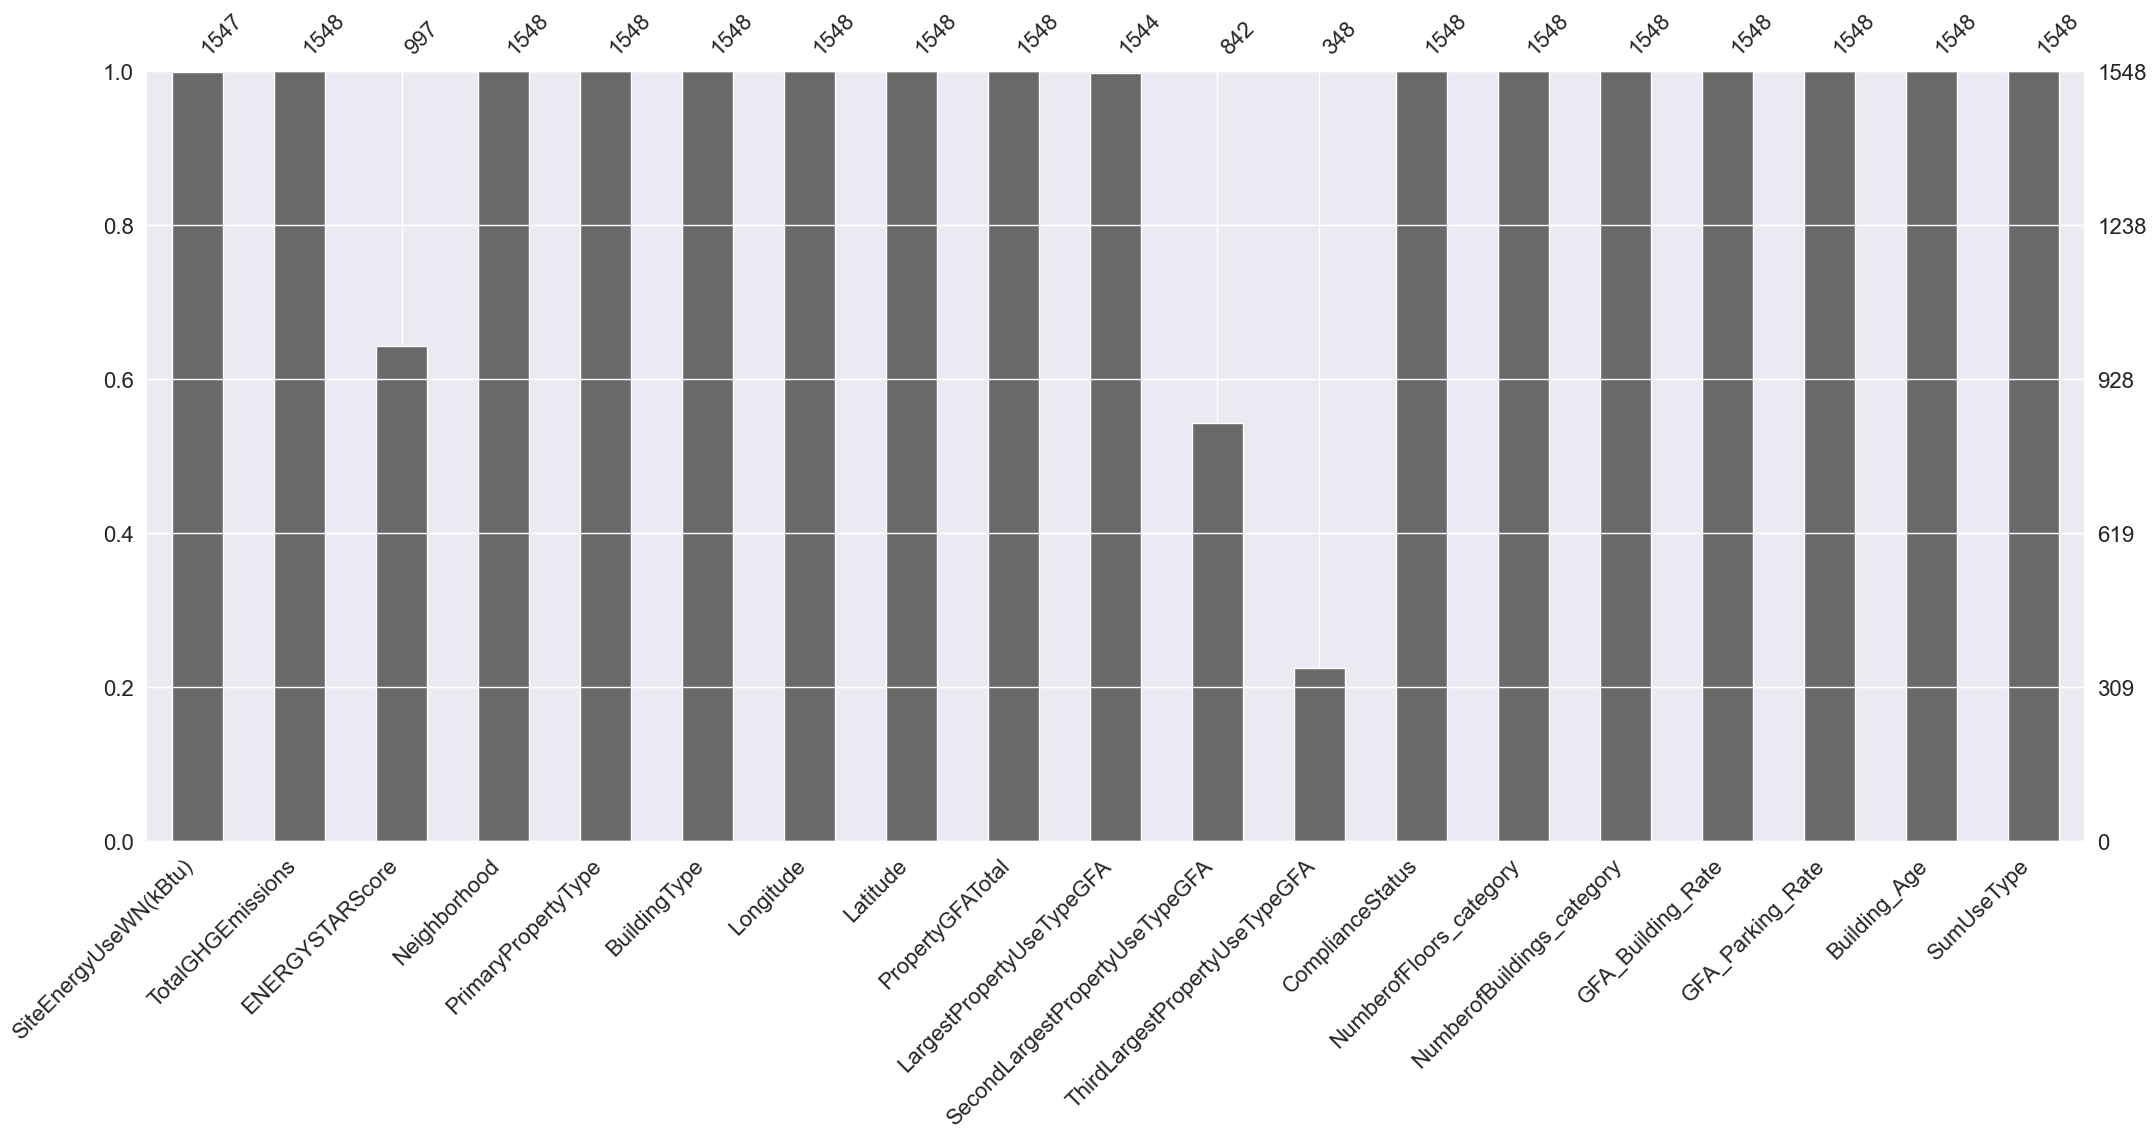

In [96]:
msno.bar(GFA_area)

In [97]:
GFA_area.isnull().sum()

SiteEnergyUseWN(kBtu)                 1
TotalGHGEmissions                     0
ENERGYSTARScore                     551
Neighborhood                          0
PrimaryPropertyType                   0
BuildingType                          0
Longitude                             0
Latitude                              0
PropertyGFATotal                      0
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseTypeGFA     706
ThirdLargestPropertyUseTypeGFA     1200
ComplianceStatus                      0
NumberofFloors_category               0
NumberofBuildings_category            0
GFA_Building_Rate                     0
GFA_Parking_Rate                      0
Building_Age                          0
SumUseType                            0
dtype: int64

In [98]:
GFA_area = GFA_area.drop(columns = ["ThirdLargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA","PropertyGFATotal",
                                   "ComplianceStatus"], axis = 1)
GFA_area.head()

,SiteEnergyUseWN(kBtu),TotalGHGEmissions,ENERGYSTARScore,Neighborhood,PrimaryPropertyType,BuildingType,Longitude,Latitude,LargestPropertyUseTypeGFA,NumberofFloors_category,NumberofBuildings_category,GFA_Building_Rate,GFA_Parking_Rate,Building_Age,SumUseType
0,7456910.0,249.98,60.0,DOWNTOWN,Hotel,NonResidential,-122.33799,47.61220,88434.0,6 et plus,1 et moins,1.00,0.00,89,1
1,8664479.0,295.86,61.0,DOWNTOWN,Hotel,NonResidential,-122.33393,47.61317,83880.0,6 et plus,1 et moins,0.85,0.15,20,3
2,73937112.0,2089.28,43.0,DOWNTOWN,Hotel,NonResidential,-122.33810,47.61393,756493.0,6 et plus,1 et moins,0.79,0.21,47,1
3,6946800.5,286.43,56.0,DOWNTOWN,Hotel,NonResidential,-122.33664,47.61412,61320.0,6 et plus,1 et moins,1.00,0.00,90,1
4,14656503.0,505.01,75.0,DOWNTOWN,Hotel,NonResidential,-122.34047,47.61375,123445.0,6 et plus,1 et moins,0.65,0.35,36,3


### **Gestion des Valeurs aberrantes**

In [99]:
# cette variable "SiteEnergyUseWN(kBtu)" étant une variable prédicte la valeur manquante sera supprimer
GFA_area = GFA_area.dropna(subset=["SiteEnergyUseWN(kBtu)"])

In [100]:
GFA_area.isnull().sum()

SiteEnergyUseWN(kBtu)           0
TotalGHGEmissions               0
ENERGYSTARScore               551
Neighborhood                    0
PrimaryPropertyType             0
BuildingType                    0
Longitude                       0
Latitude                        0
LargestPropertyUseTypeGFA       4
NumberofFloors_category         0
NumberofBuildings_category      0
GFA_Building_Rate               0
GFA_Parking_Rate                0
Building_Age                    0
SumUseType                      0
dtype: int64

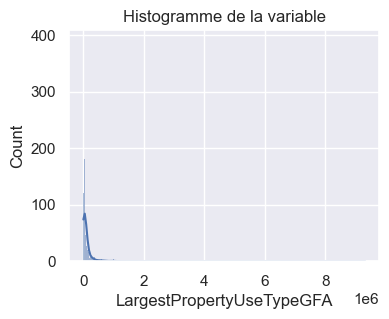

In [101]:
# Histogramme
plt.figure(figsize=(4,3))
sns.histplot(GFA_area['LargestPropertyUseTypeGFA'], kde=True)
plt.title("Histogramme de la variable")
plt.show()

### **Transformation des variables catégorielles**

In [102]:
# Liste des colonnes catégorielles à encoder
Variables_categorielles = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Building_Age']
GFA_area[Variables_categorielles].head()

,BuildingType,PrimaryPropertyType,Neighborhood,Building_Age
0,NonResidential,Hotel,DOWNTOWN,89
1,NonResidential,Hotel,DOWNTOWN,20
2,NonResidential,Hotel,DOWNTOWN,47
3,NonResidential,Hotel,DOWNTOWN,90
4,NonResidential,Hotel,DOWNTOWN,36


- **Analyse des variables ordinales**

<span style="color: blue;"> - Building_Age </span>

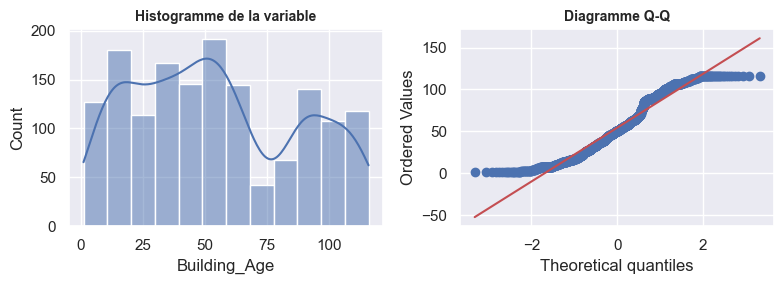

In [103]:
# Création des sous-plots
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
# Histogramme avec la densité KDE
sns.histplot(GFA_area['Building_Age'], kde=True, ax=axes[0])
axes[0].set_title("Histogramme de la variable", fontsize = 10, fontweight = 'bold')
# Diagramme Q-Q
stats.probplot(GFA_area['Building_Age'], dist="norm", plot=axes[1])
axes[1].set_title("Diagramme Q-Q", fontsize = 10, fontweight = 'bold')
plt.tight_layout()
plt.show()

**Cette variable n'est pas normale d'après le diagramme Q-Q**, il faut la catégorisée.

In [104]:
df_NumberofFloors  = GFA_area['Building_Age'].value_counts(normalize=True, dropna=False)*100
# transformons l'âge en variable catégorielle
pd.qcut(GFA_area.Building_Age, q=7).head()

0    (75.0, 98.0]
1    (16.0, 31.0]
2    (46.0, 56.0]
3    (75.0, 98.0]
4    (31.0, 46.0]
Name: Building_Age, dtype: category
Categories (7, interval[float64, right]): [(0.999, 16.0] < (16.0, 31.0] < (31.0, 46.0] < (46.0, 56.0] < (56.0, 75.0] < (75.0, 98.0] < (98.0, 116.0]]

In [105]:
# transformation en variable catégorielle ordinaire
GFA_area['Building_Age_cat'] = pd.qcut(GFA_area.Building_Age, q=7, labels=['16 et moins',
                                                               '16 - 31',
                                                               '31 - 43',
                                                               '43 - 54',
                                                               '54 - 67',
                                                               '67 - 95',
                                                               '95 et plus'          
                                                                       ])

Building_Age_cat
16 et moins    15.190692
31 - 43        15.190692
67 - 95        14.544279
16 - 31        14.285714
95 et plus     13.962508
43 - 54        13.703943
54 - 67        13.122172
Name: proportion, dtype: float64


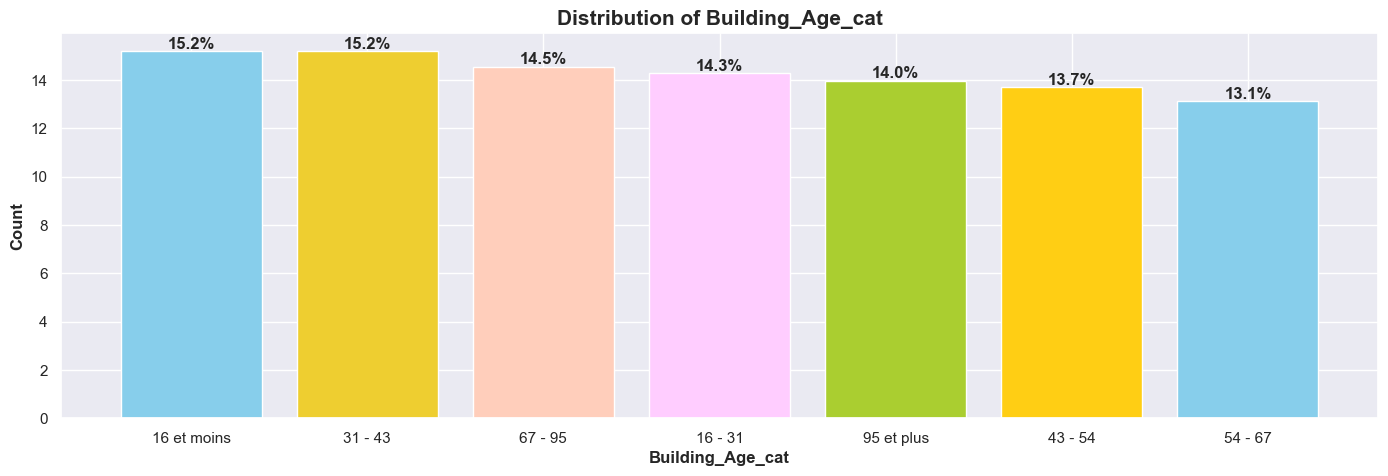

In [106]:
age_df = GFA_area['Building_Age_cat'].value_counts(normalize=True, dropna=False)*100
print(age_df)
# Plot the bar chart
plt.figure(figsize =(17,5))
plt.bar(age_df.index, age_df.values, color = ['Skyblue','#EECE30','#FFCEBB','#FFCDFF','#AACE30','#FFCE14'] )
percentage = age_df / age_df.sum() * 100

for i in range(len(age_df)):
    plt.text(age_df.index[i], age_df.values[i], f'{percentage.iloc[i]:.1f}%', ha='center', va ='bottom',fontweight ='bold', fontsize = 12)

plt.xlabel('Building_Age_cat',fontweight ='bold', fontsize = 12)   
plt.ylabel('Count',fontweight ='bold', fontsize = 12)
plt.title('Distribution of Building_Age_cat',fontweight ='bold', fontsize = 15)
plt.show()

In [107]:
df_label1 = GFA_area
# Encodage des Colonnes catégorielles en utilisant la classe << LabelEncoder >>
labelle = LabelEncoder()
df_label1['Building_Age_label_encoded'] = labelle.fit_transform(df_label1['Building_Age_cat'])
df_label1=df_label1.drop(columns=['Building_Age','Building_Age_cat'], axis = 1)

<span style="color: blue;"> - NumberofFloors_category </span>

NumberofFloors_category
1 et moins    439
1 - 2         350
6 et plus     274
2 - 3         243
3 - 6         242
Name: count, dtype: int64


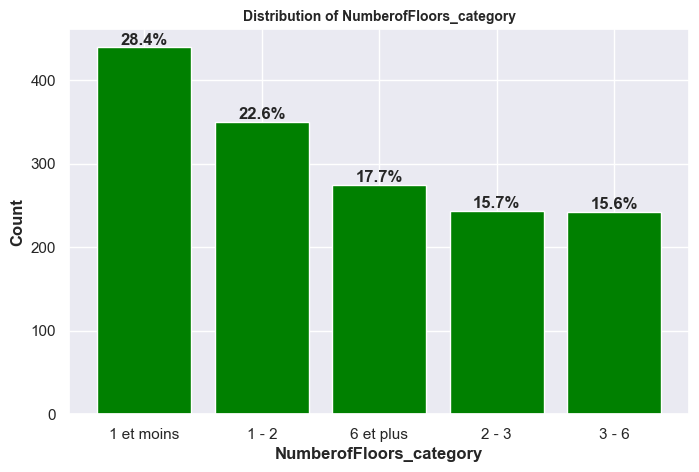

In [108]:
print(floor)
# Plot the bar chart
plt.figure(figsize =(8,5))
plt.bar(floor.index, floor.values, color = ['green'] )
percentage = floor / floor.sum() * 100

for i in range(len(floor)):
    plt.text(floor.index[i], floor.values[i], f'{percentage.iloc[i]:.1f}%', ha='center', va ='bottom',fontweight ='bold', fontsize = 12)

plt.xlabel('NumberofFloors_category',fontweight ='bold', fontsize = 12)   
plt.ylabel('Count',fontweight ='bold', fontsize = 12)
plt.title('Distribution of NumberofFloors_category',fontweight ='bold', fontsize = 10)
plt.show()

In [110]:
df_label2 = df_label1
df_label2['NumberofFloors_label_encoded'] = labelle.fit_transform(df_label2['NumberofFloors_category'])
df_label2 = df_label2.drop(columns=['NumberofFloors_category'], axis = 1)

<span style="color: blue;"> - NumberofBuildings_category </span>

In [111]:
df_label3 = df_label2
df_label3['NumberofBuildings_label_encoded'] = labelle.fit_transform(df_label3['NumberofBuildings_category'])
df_label3 = df_label3.drop(columns=['NumberofBuildings_category'], axis = 1)

- **Variables Nominales**

<span style="color: blue;"> - Neighborhood, PrimaryPropertyType, BuildingType </span>

In [112]:
# Appliquer le One-Hot Encoding
df_encoded = pd.get_dummies(df_label3, columns=['Neighborhood','PrimaryPropertyType','BuildingType'])

In [113]:
df_encoded.head()

,SiteEnergyUseWN(kBtu),TotalGHGEmissions,ENERGYSTARScore,Longitude,Latitude,LargestPropertyUseTypeGFA,GFA_Building_Rate,GFA_Parking_Rate,SumUseType,Building_Age_label_encoded,...,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12
0,7456910.0,249.98,60.0,-122.33799,47.61220,88434.0,1.00,0.00,1,5,...,False,False,False,False,False,False,True,False,False,False
1,8664479.0,295.86,61.0,-122.33393,47.61317,83880.0,0.85,0.15,3,0,...,False,False,False,False,False,False,True,False,False,False
2,73937112.0,2089.28,43.0,-122.33810,47.61393,756493.0,0.79,0.21,1,3,...,False,False,False,False,False,False,True,False,False,False
3,6946800.5,286.43,56.0,-122.33664,47.61412,61320.0,1.00,0.00,1,5,...,False,False,False,False,False,False,True,False,False,False
4,14656503.0,505.01,75.0,-122.34047,47.61375,123445.0,0.65,0.35,3,2,...,False,False,False,False,False,False,True,False,False,False


<Axes: >

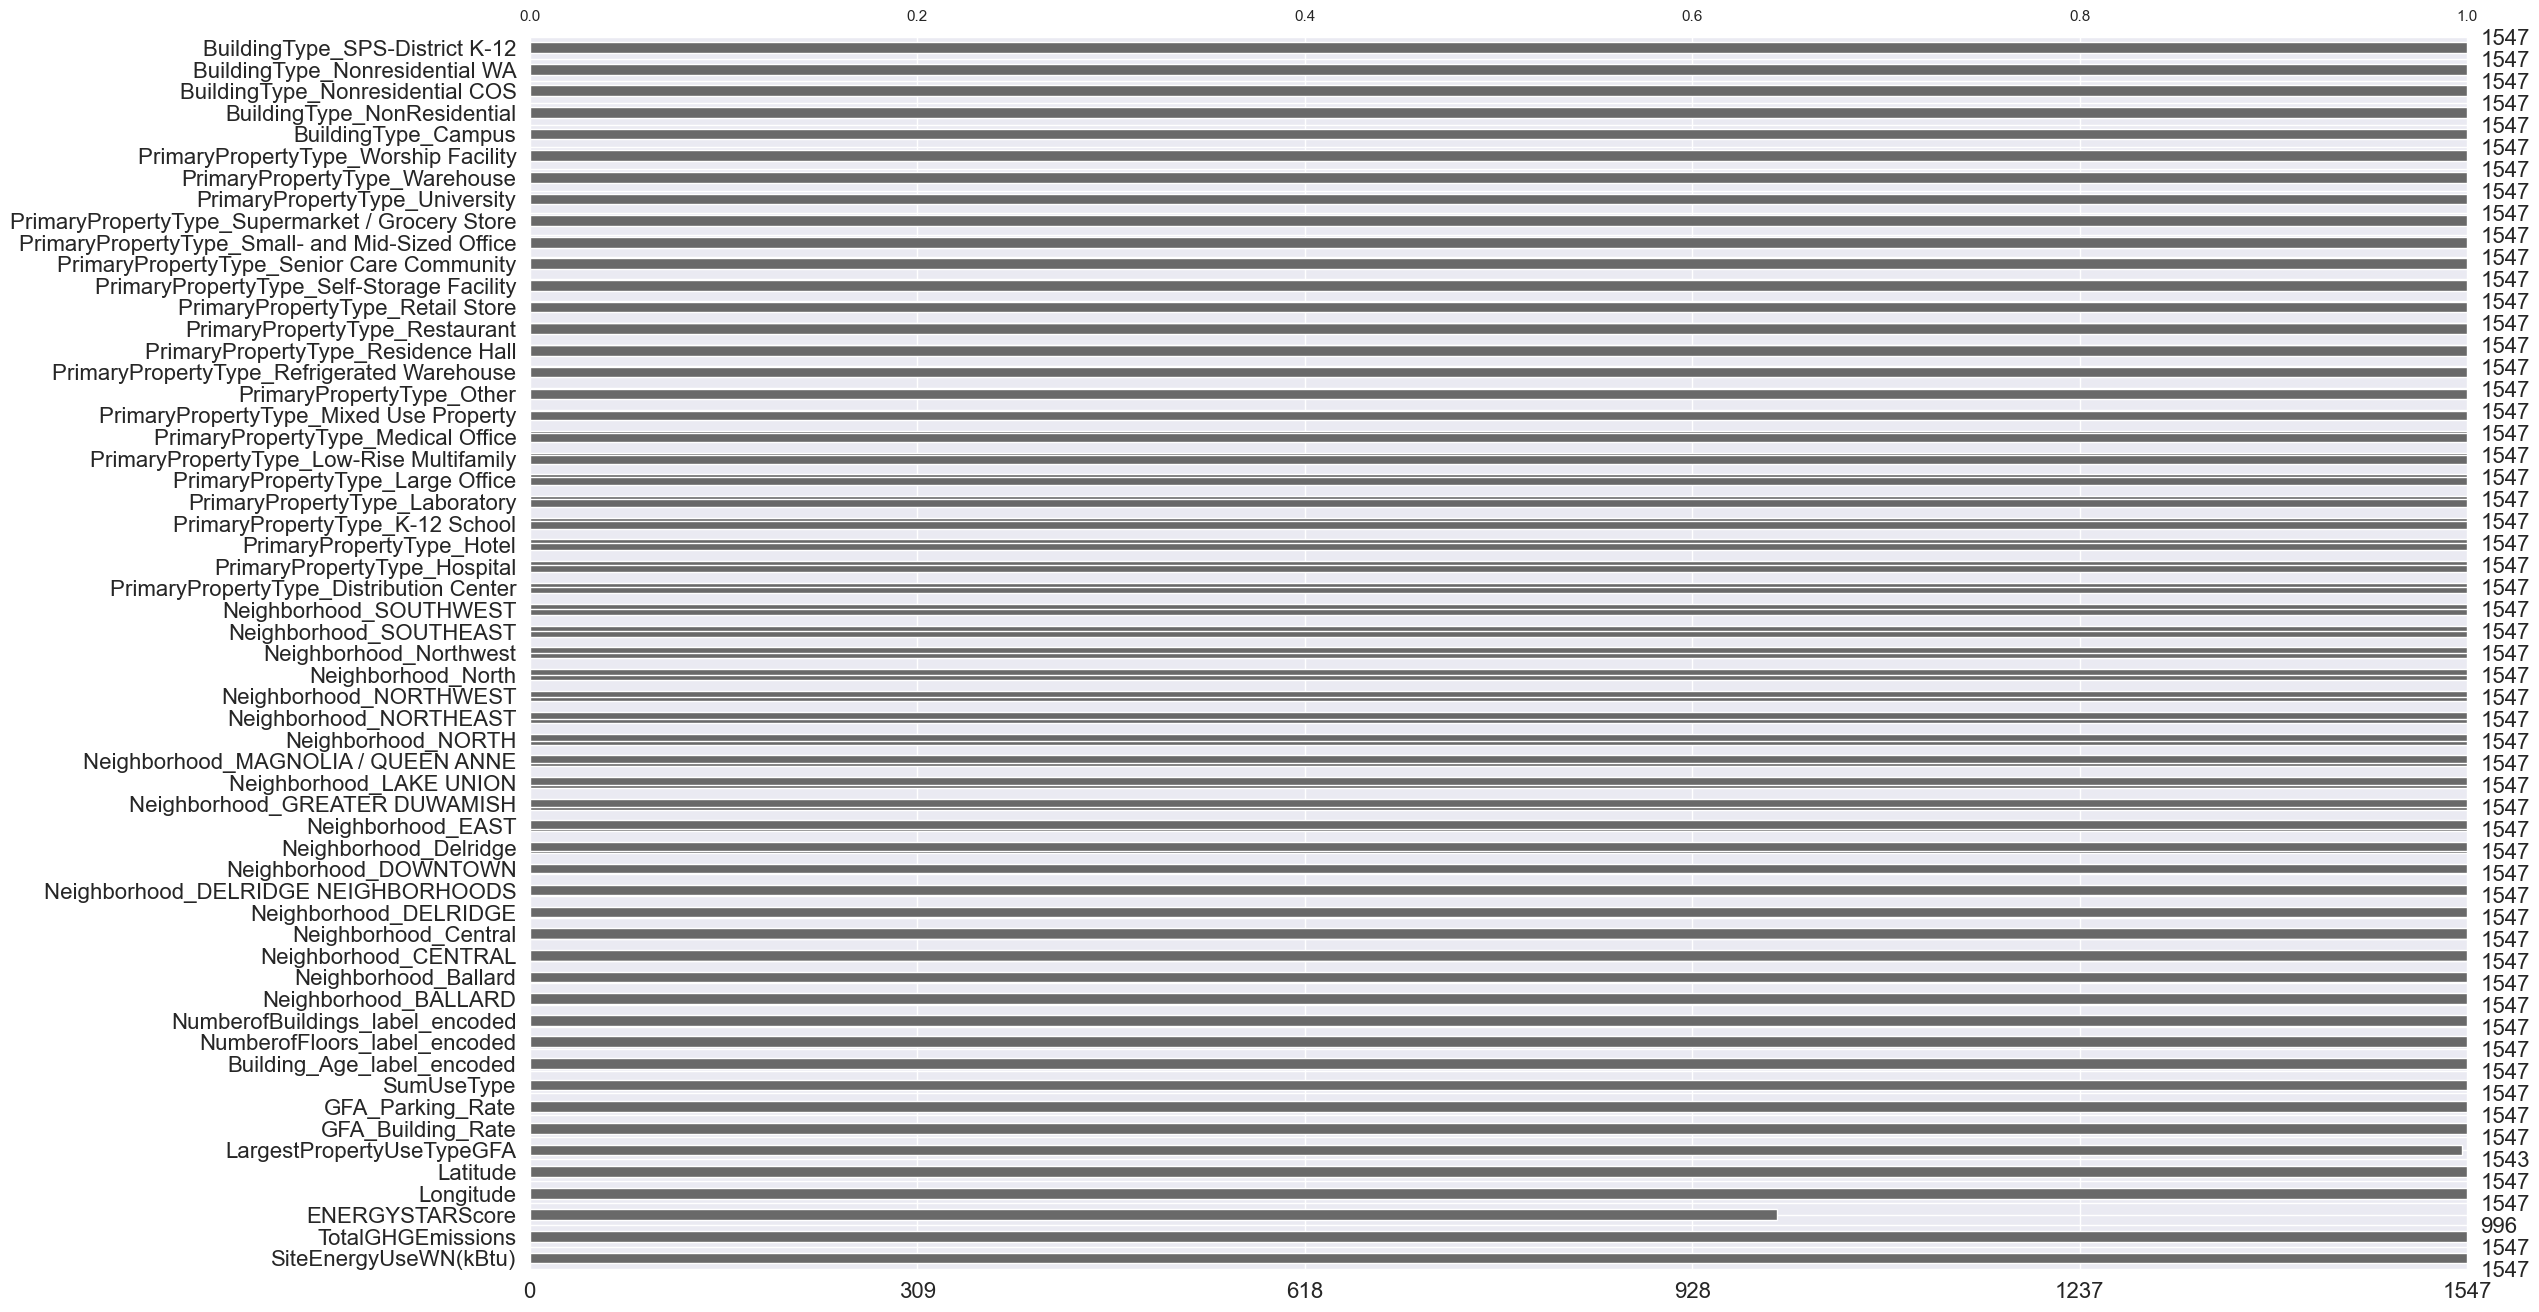

In [118]:
# Visualiser les données manquantes
msno.bar(df_encoded)

In [119]:
df_encoded.to_csv("C:/Users/521169/Documents/Openclassrooms/Projet 4/Targets/Anticipez les besoins en consommation de bâtiments/df_Energystarstore_trainVal.csv", index = False)